# Importing Data

## Loading and Displaying DataFrame



Importing the necessary libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

Reading the CSV file into a dataFrame and displaying the first few rows of the DataFrame to examine its structure and contents

In [24]:
df = pd.read_csv('Initial_cleaned_df.csv')
pd.set_option('display.max_columns', None)
df.head()

hospital_id   age        bmi  elective_surgery  ethnicity gender  height  \
0          118  68.0  22.732803                 0  Caucasian      M   180.3   
1           81  77.0  27.421875                 0  Caucasian      F   160.0   
2          118  25.0  31.952749                 0  Caucasian      F   172.7   
3          118  81.0  22.635548                 1  Caucasian      F   165.1   
4           33  19.0        NaN                 0  Caucasian      M   188.0   

  hospital_admit_source           icu_admit_source  icu_id icu_stay_type  \
0                 Floor                      Floor      92         admit   
1                 Floor                      Floor      90         admit   
2  Emergency Department       Accident & Emergency      93         admit   
3        Operating Room  Operating Room / Recovery      92         admit   
4                   NaN       Accident & Emergency      91         admit   

       icu_type  pre_icu_los_days  weight  albumin_apache  apache_2_diagnosis  \
0         CTICU          0.541667    73.9             2.3               113.0   
1  Med-Surg ICU          0.927778    70.2             NaN               108.0   
2  Med-Surg ICU          0.000694    95.3             NaN               122.0   
3         CTICU          0.000694    61.7             NaN               203.0   
4  Med-Surg ICU          0.073611     NaN             NaN               119.0   

   apache_3j_diagnosis  apache_post_operative  arf_apache  bilirubin_apache  \
0               502.01                      0           0               0.4   
1               203.01                      0           0               NaN   
2               703.03                      0           0               NaN   
3              1206.03                      1           0               NaN   
4               601.01                      0           0               NaN   

   bun_apache  creatinine_apache  fio2_apache  gcs_eyes_apache  \
0        31.0               2.51          NaN              3.0   
1         9.0               0.56          1.0              1.0   
2         NaN                NaN          NaN              3.0   
3         NaN                NaN          0.6              4.0   
4         NaN                NaN          NaN              NaN   

   gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
0               6.0                0.0                4.0           168.0   
1               3.0                0.0                1.0           145.0   
2               6.0                0.0                5.0             NaN   
3               6.0                0.0                5.0           185.0   
4               NaN                NaN                NaN             NaN   

   heart_rate_apache  hematocrit_apache  intubated_apache  map_apache  \
0              118.0               27.4                 0        40.0   
1              120.0               36.9                 0        46.0   
2              102.0                NaN                 0        68.0   
3              114.0               25.9                 1        60.0   
4               60.0                NaN                 0       103.0   

   paco2_apache  pao2_apache  ph_apache  resprate_apache  sodium_apache  \
0           NaN          NaN        NaN             36.0          134.0   
1          37.0         51.0       7.45             33.0          145.0   
2           NaN          NaN        NaN             37.0            NaN   
3          30.0        142.0       7.39              4.0            NaN   
4           NaN          NaN        NaN             16.0            NaN   

   temp_apache  urineoutput_apache  ventilated_apache  wbc_apache  \
0         39.3                 NaN                  0        14.1   
1         35.1                 NaN                  1        12.7   
2         36.7                 NaN                  0         NaN   
3         34.8                 NaN                  1         8.0   
4         36.7

# Performing Exploratory Data Analysis

Gathering numerical and categorical columns in separate variables.

In [25]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

## Univariate Analysis

### Numerical Features

Examining the distribution of data within each numerical feature individually through histograms.

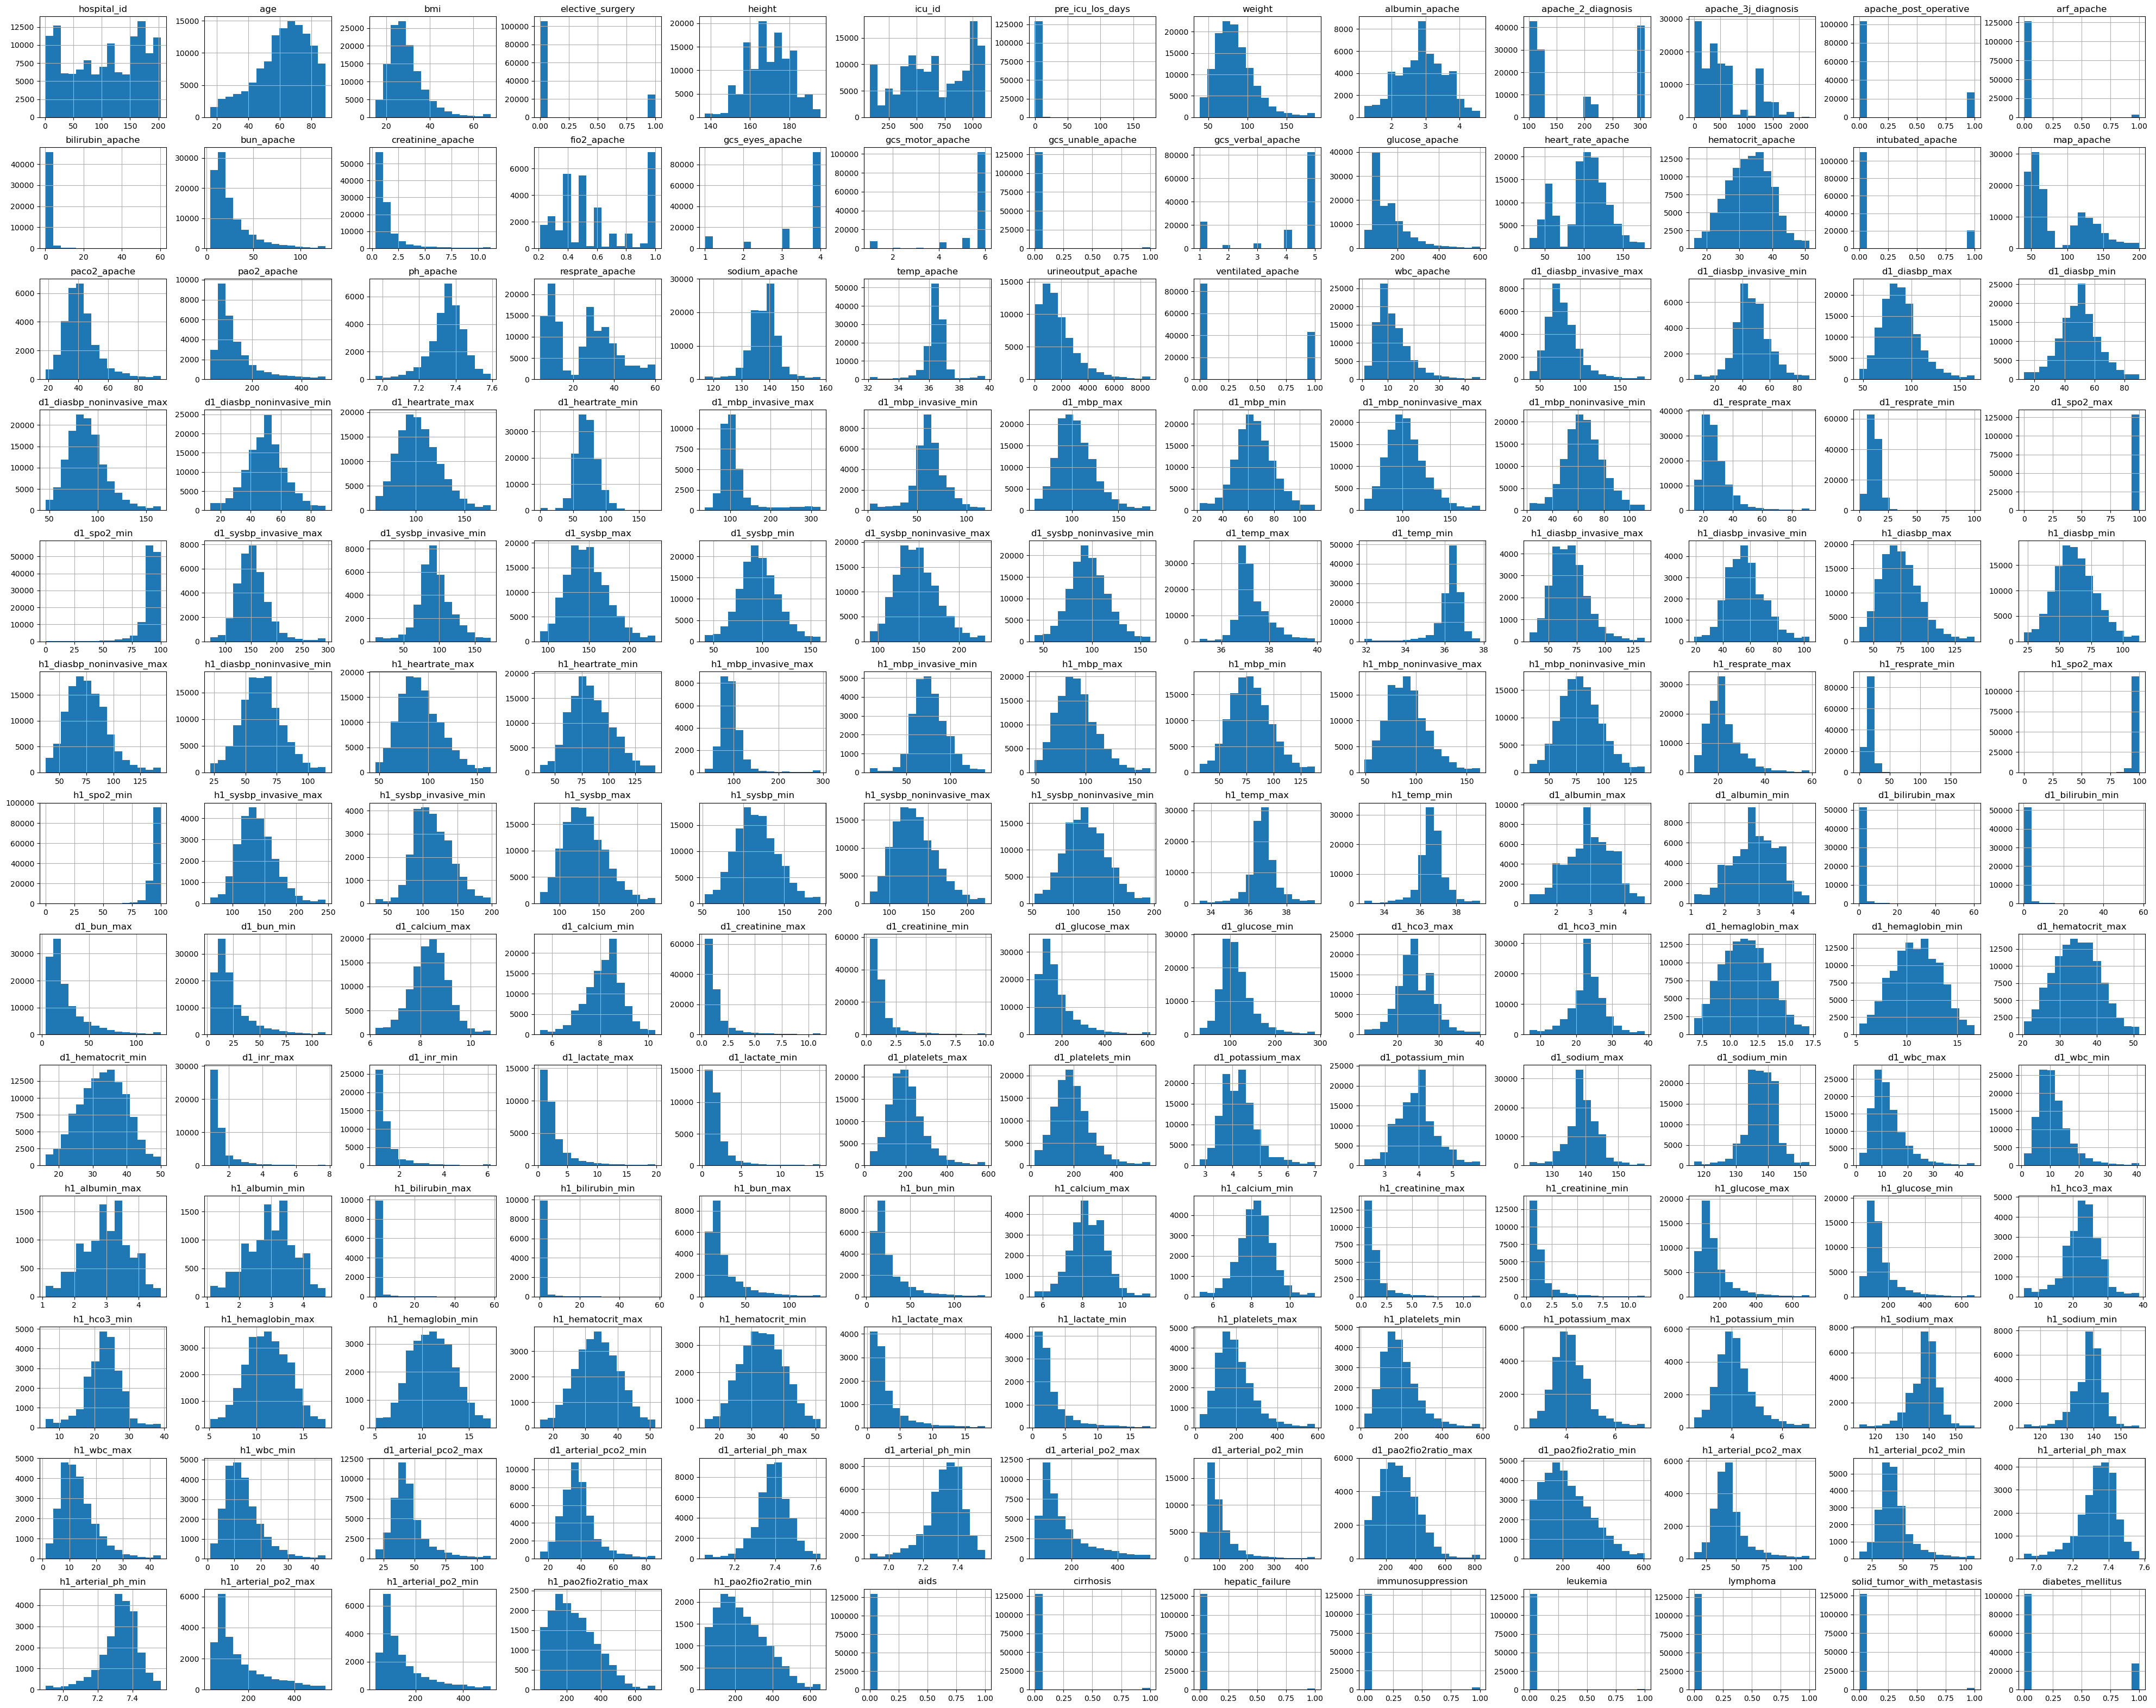

In [4]:
df[numeric_cols].hist(figsize=(50,40),bins = 15)
plt.show()

Analysing Age feature

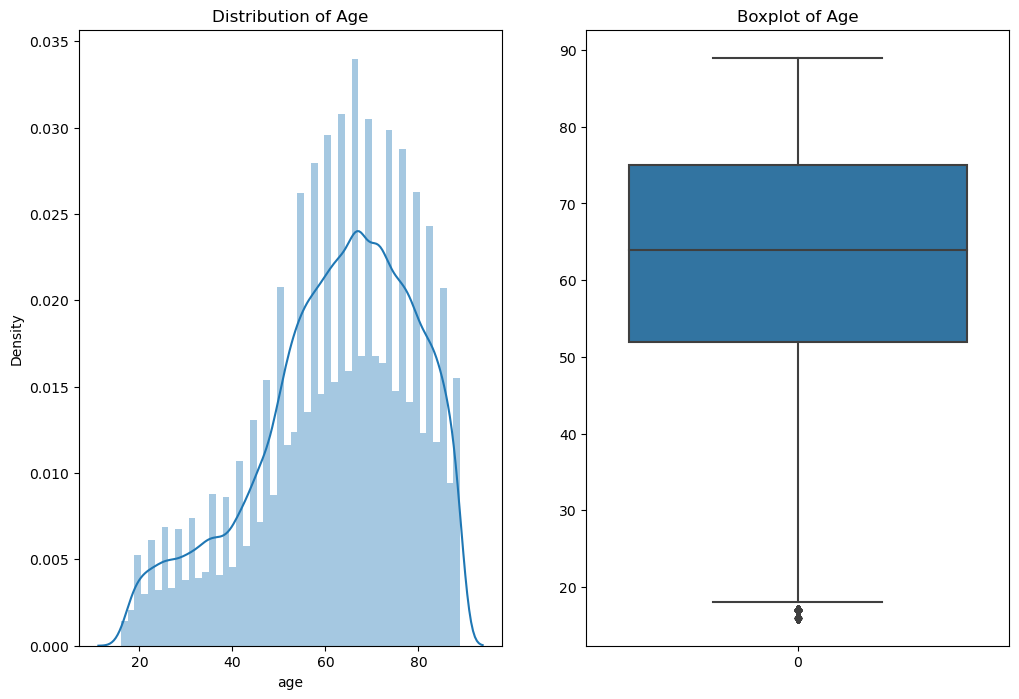

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))

axes[0].set_title(f'Distribution of Age')
sns.distplot(df['age'], ax=axes[0])

axes[1].set_title(f'Boxplot of Age')
sns.boxplot(df['age'], ax=axes[1])

plt.show()

The Age Distribution exhibits a deviation from the normal distribution, showing a left skew, with the majority of data falling between 50 and 80 years.

### Categorical Features

Examining the distribution of data within each categorical feature individually

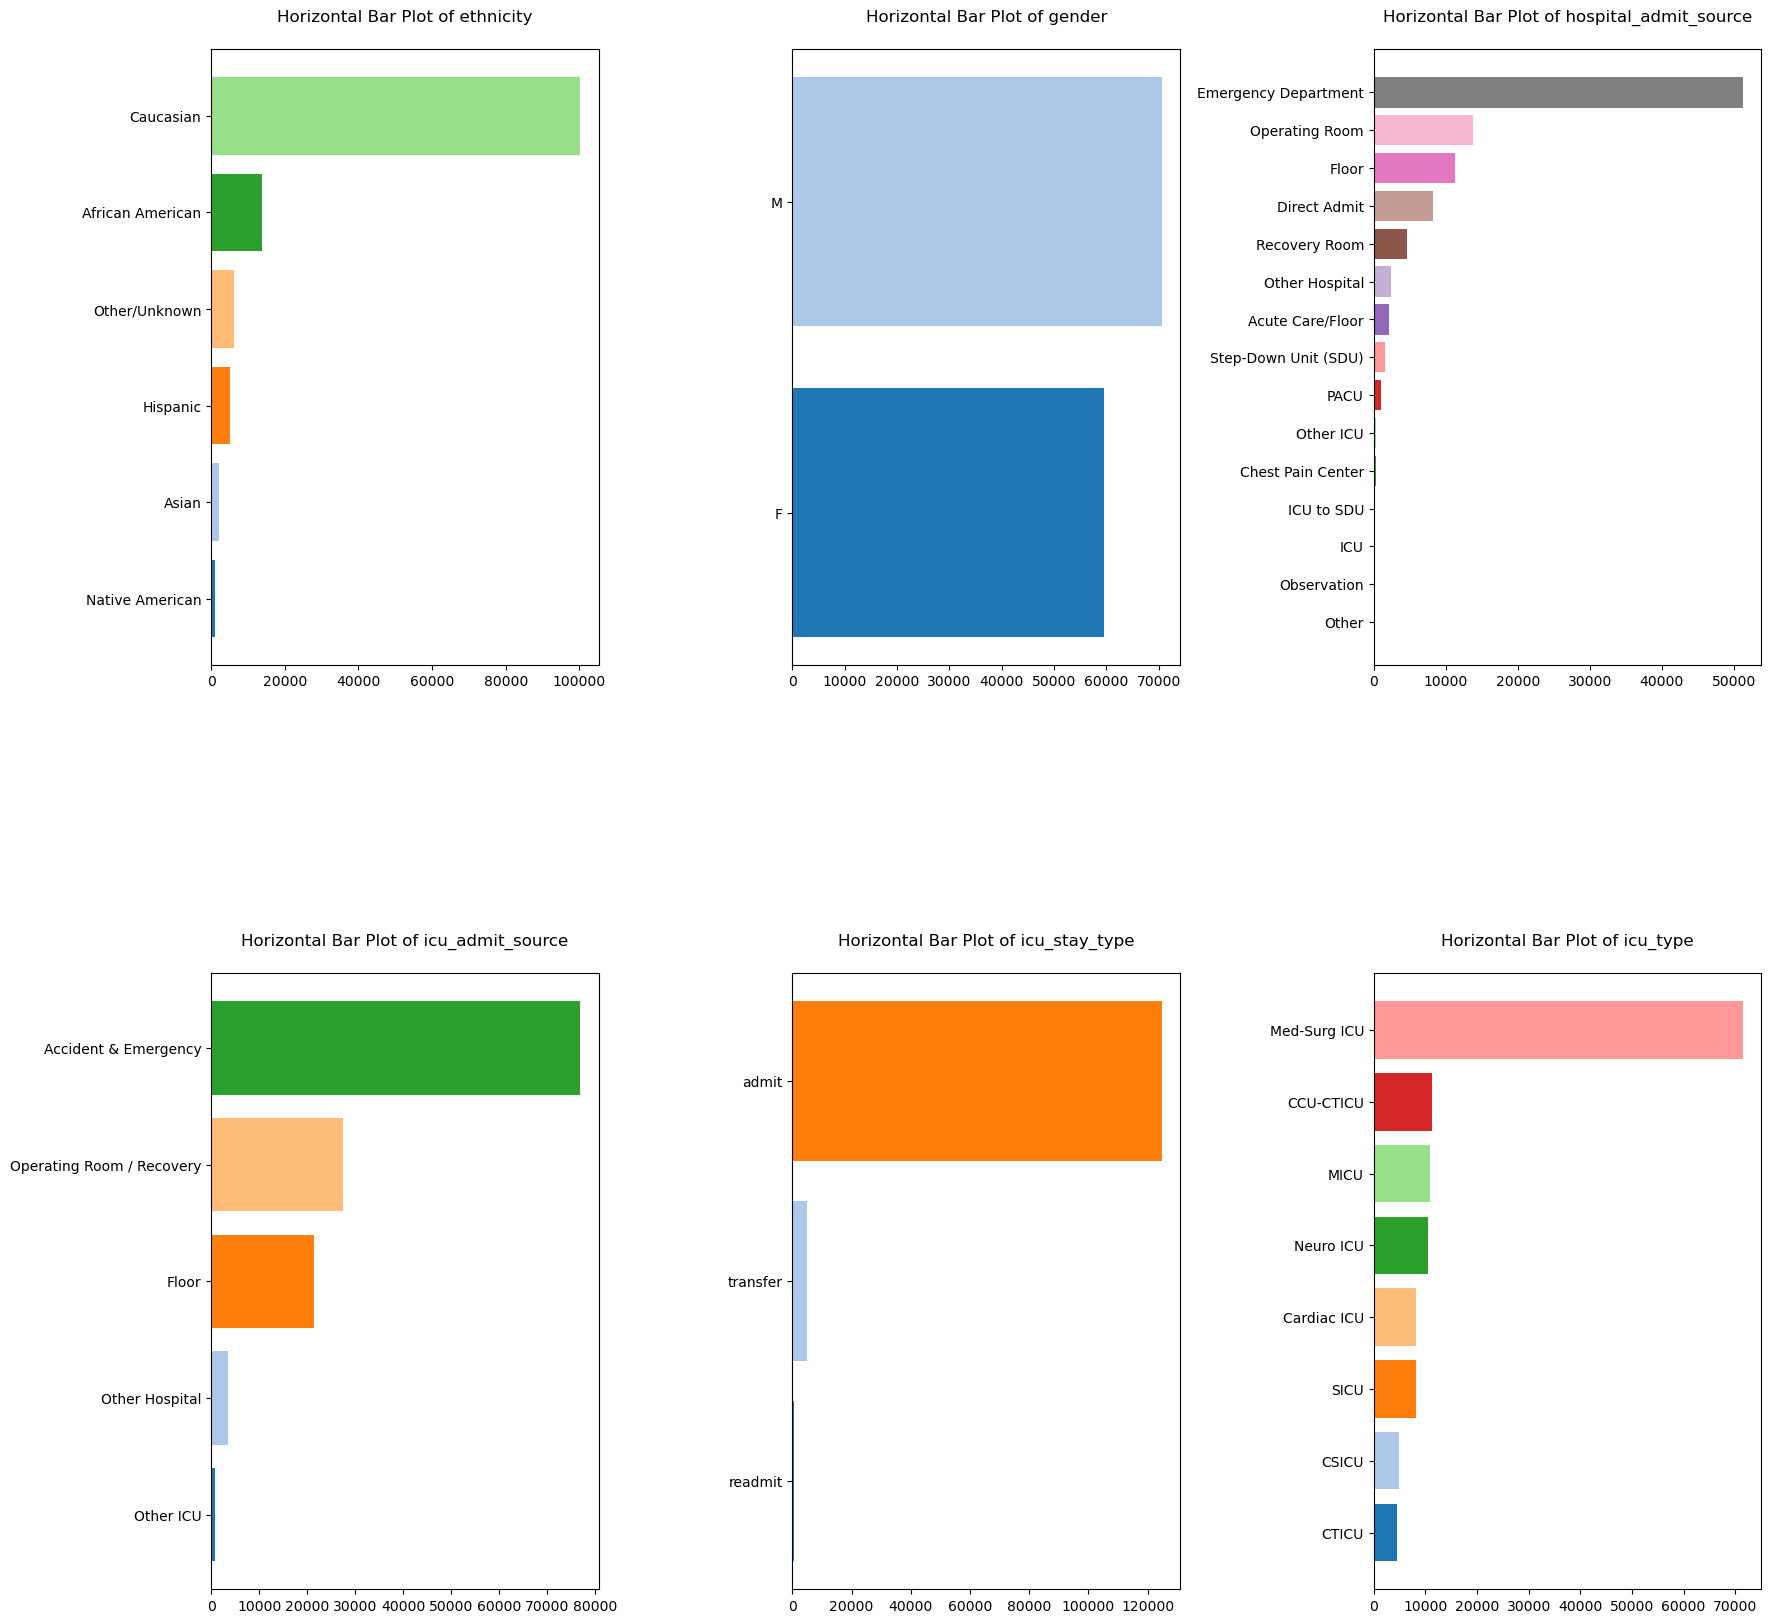

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))

for i, col in enumerate(categorical_cols):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    value_counts = df[col].value_counts(ascending=True)
    ax.barh(value_counts.index, value_counts, color=plt.cm.tab20.colors)
    ax.set_title(f"Horizontal Bar Plot of {col}", pad=20)
    ax.title.set_position([0.5, 1.1])


plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

*Key Insights from above plots*:

* The ethnic distribution reveals Caucasian as the predominant group, followed by African American, Hispanic, Asian, and Native American.
* There is a notable predominance of male patients compared to female patients in the dataset.
* The primary sources of hospital admission are the Emergency Department, followed by the Operating Room, Floor admissions, and Direct Admit cases.
* Similarly, the Accident & Emergency Department is the predominant source for ICU admissions, followed by the Operating Room/Recovery Room, Floor, and Other Hospital admissions.
* From the graph we can see most of the ICU paitents were from admission and Re admission was also very less which indicates excellant recovery rate.
* Among ICU types, the Medical-Surgical ICU (Med-Surg ICU) is the most prevalent, succeeded by SCardiac ICU (CCU-CTICU), MICU, Neuro ICU.

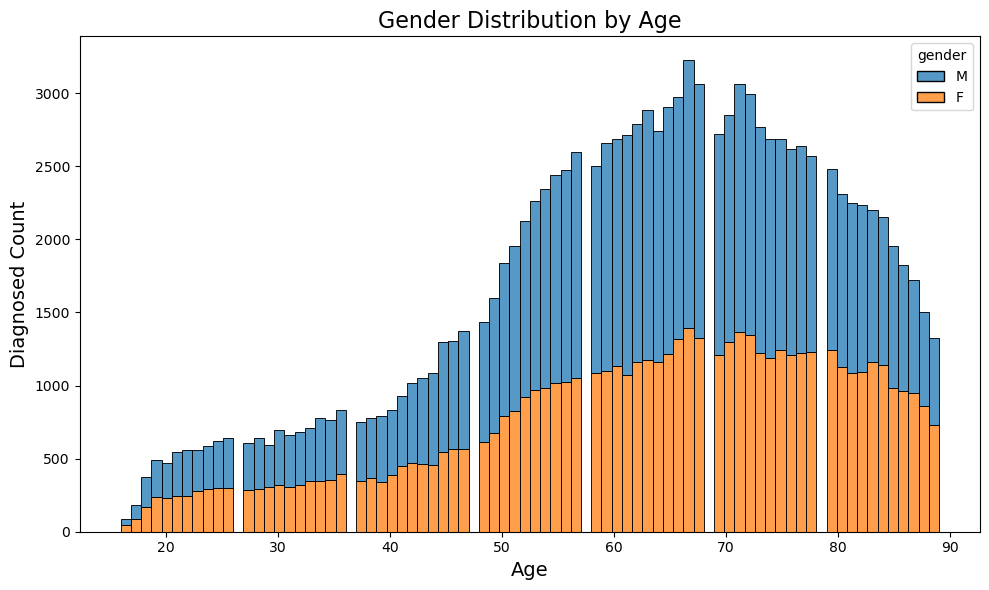

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

temp_data = df[["gender", "age", "diabetes_mellitus"]].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(data=temp_data, x="age", hue="gender", multiple="stack", palette=["#1f77b4", "#ff7f0e"])

plt.title('Gender Distribution by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Diagnosed Count', fontsize=14)

plt.tight_layout()
plt.show()

Insights: 
* The age distribution of patients with diabetes mellitus shows that the majority of those diagnosed are between 60 and 70 years old.
* When comparing the gender distribution for patients with diabetes mellitus, the data indicates that men have the highest number of positive cases compared to women.

*Ethnicity Distribution*

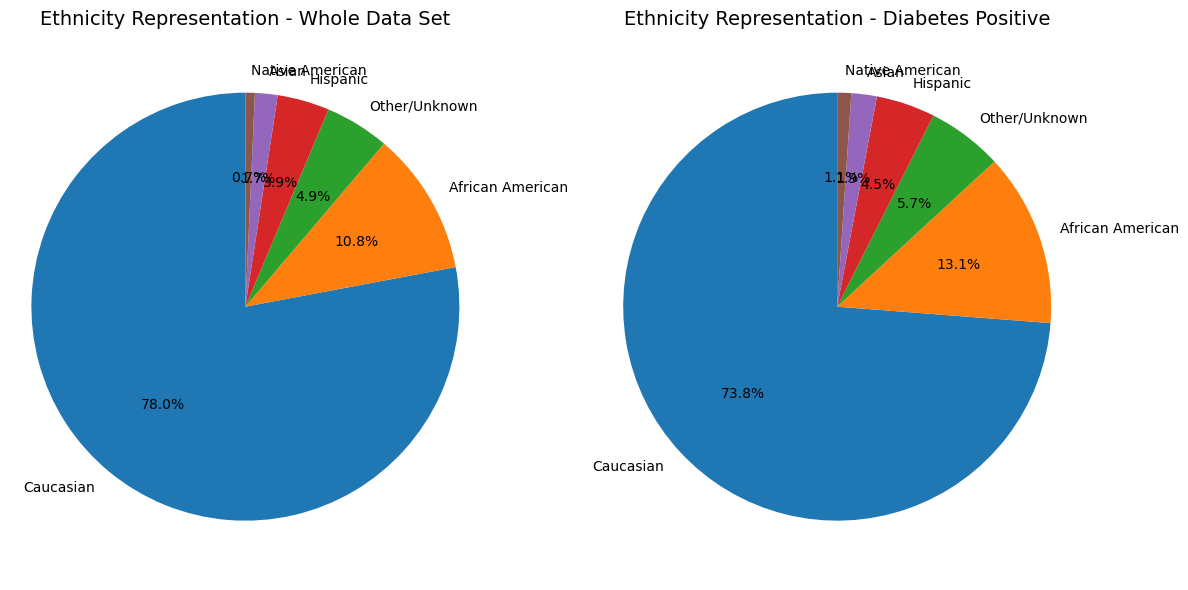

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

ethnicity_counts = df["ethnicity"].value_counts()
diabetes_ethnicity_counts = df[df["diabetes_mellitus"] == 1]["ethnicity"].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(ethnicity_counts.values, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Ethnicity Representation - Whole Data Set", fontsize=14)
ax1.axis('equal')

ax2.pie(diabetes_ethnicity_counts.values, labels=diabetes_ethnicity_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Ethnicity Representation - Diabetes Positive", fontsize=14)
ax2.axis('equal')

plt.tight_layout()
plt.show()

It is observed that majority of the Caucasians have diabetes mellitus compared to others and they are the more number of people who are diagnosed compared to people of other region

*Hospital Admit Source Vs Number of Patients Admitted*

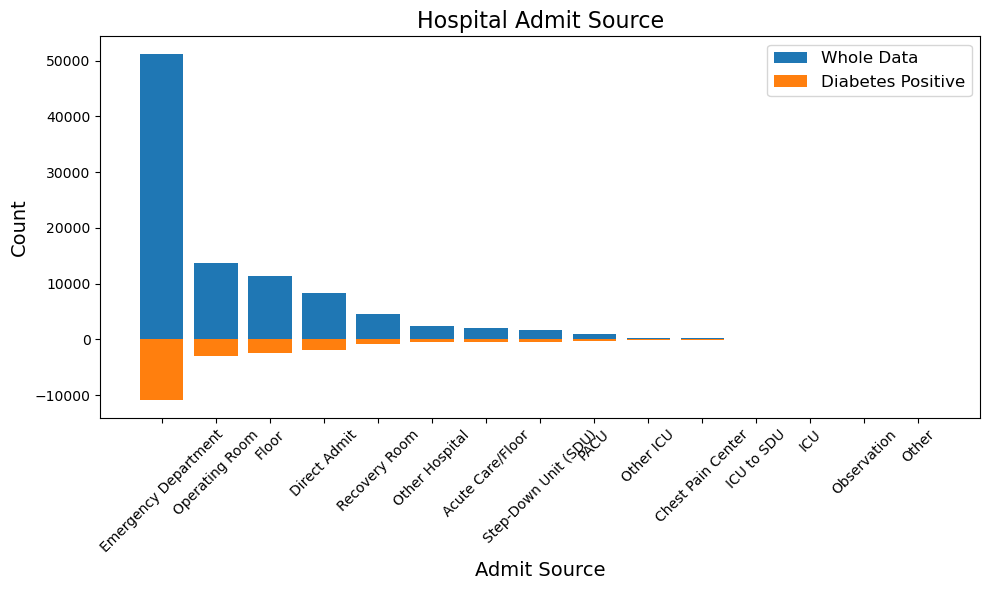

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# hospital_admit_source
admit_source_counts = df["hospital_admit_source"].value_counts()
diabetes_admit_source_counts = df[df["diabetes_mellitus"] == 1]["hospital_admit_source"].value_counts()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(admit_source_counts.index, admit_source_counts.values, color='#1f77b4', label='Whole Data')
ax.bar(diabetes_admit_source_counts.index, -diabetes_admit_source_counts.values, color='#ff7f0e', label='Diabetes Positive')

ax.set_title('Hospital Admit Source', fontsize=16)
ax.set_xlabel('Admit Source', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

As we can see from the above plot, more people have been diagnosed with diabetes mellitus from the emergency department's admit source.

#### Checking for Imbalanace issue

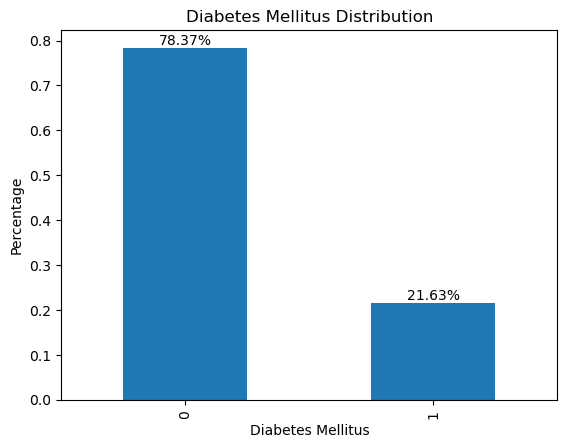

In [6]:
value_counts = df['diabetes_mellitus'].value_counts(normalize=True)
ax = value_counts.plot(kind='bar')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Diabetes Mellitus Distribution')
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Percentage')
plt.show()

We can notice an imbalance within the dataset. This needs to be addressed later in our analysis to ensure model performance isn't biased towards the majority class.

*Overlay histograms for BMI with diabetes_mellitus*

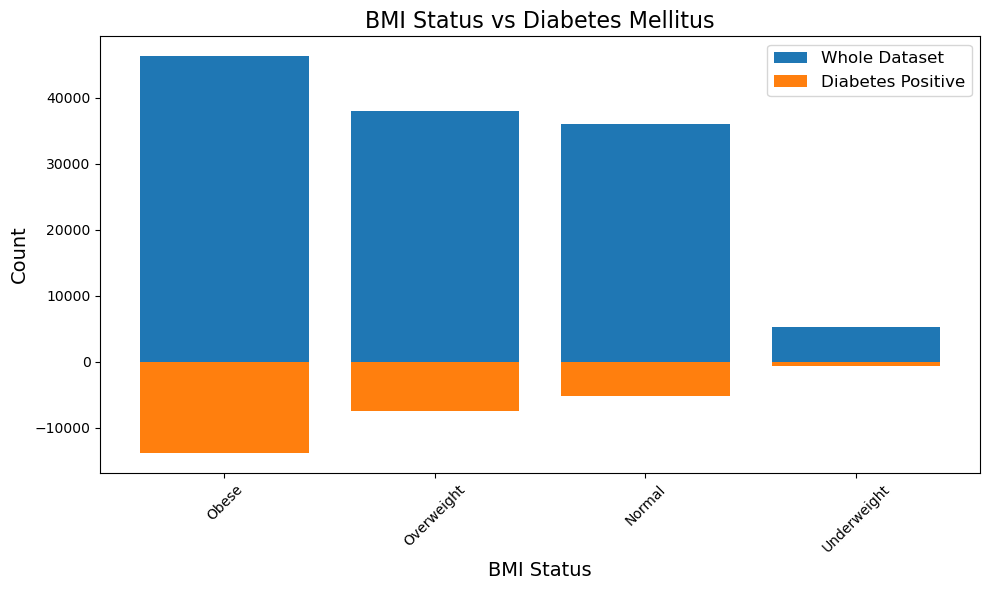

In [39]:
bmi_cut = df.copy()
bmi_cut["bmi"] = pd.cut(df["bmi"], labels=["Underweight", "Normal", "Overweight", "Obese"], bins=[0, 18.5, 24.9, 30, 100])

bmi_counts = bmi_cut["bmi"].value_counts().reset_index()
bmi_counts.columns = ["bmi", "count"]

diabetes_bmi_counts = bmi_cut[bmi_cut["diabetes_mellitus"] == 1]["bmi"].value_counts().reset_index()
diabetes_bmi_counts.columns = ["bmi", "count"]

plt.figure(figsize=(10, 6))

plt.bar(bmi_counts["bmi"], bmi_counts["count"], color='#1f77b4', label='Whole Dataset')
plt.bar(diabetes_bmi_counts["bmi"], -diabetes_bmi_counts["count"], color='#ff7f0e', label='Diabetes Positive')

plt.title('BMI Status vs Diabetes Mellitus', fontsize=16)
plt.xlabel('BMI Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

From the plot, we can observe people who are obese having high BMI are mostly diagnosed with diabetes mellitus. Where as people with less BMI less likely to be diagnosed with diabetes mellitus.

*Correlation Analysis*

In [11]:
corr_matrix = df[numeric_cols].corr().round(2)
corr_matrix.style.background_gradient(cmap='YlOrRd', vmin=-1, vmax=1)

Below columns are highly correlated with the target variable

In [16]:
diabetes_corr = corr_matrix['diabetes_mellitus'].sort_values(ascending=False)
top_correlated_features = diabetes_corr[diabetes_corr != 1.0].index[:10].tolist()
print("Top 10 Correlated Features and Correlation Values:")
for feature in top_correlated_features:
    print(f"{feature}: {diabetes_corr[feature]:.3f}")

Top 10 Correlated Features and Correlation Values:
d1_glucose_max: 0.400
glucose_apache: 0.350
h1_glucose_max: 0.320
h1_glucose_min: 0.300
bmi: 0.170
weight: 0.160
bun_apache: 0.150
d1_bun_max: 0.150
h1_bun_min: 0.140
d1_bun_min: 0.140


As we can observe from the above results, glucose features are highly correlated to target label when compared to other features, followed by bmi and weight.